In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/Lenovo/Desktop/sentimentstwittermert/dt2/Twitter_Data.csv")


In [2]:
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
5           kiya tho refresh maarkefir comment karo        0.0
6  surat women perform yagna seeks divine grace f...       0.0
7  this comes from cabinet which has scholars lik...       0.0
8  with upcoming election india saga going import...       1.0
9                         gandhi wa

In [3]:
import pandas as pd

# Assuming your DataFrame is named df
df.columns = ['tweet', 'sentiment_score']

# Add a new column 'sentiment'
df['sentiment'] = df['sentiment_score'].map({-1.0: 'negative', 0.0: 'neutral', 1.0: 'positive'})

# Drop the 'sentiment_score' column if you don't need it anymore
df = df[['tweet', 'sentiment']]

# Display the updated DataFrame
print(df.head())
print(df.info())

                                               tweet sentiment
0  when modi promised “minimum government maximum...  negative
1  talk all the nonsense and continue all the dra...   neutral
2  what did just say vote for modi  welcome bjp t...  positive
3  asking his supporters prefix chowkidar their n...  positive
4  answer who among these the most powerful world...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tweet      162976 non-null  object
 1   sentiment  162973 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB
None


In [4]:
# Check for missing values
print(df.isnull().sum())

tweet        4
sentiment    7
dtype: int64


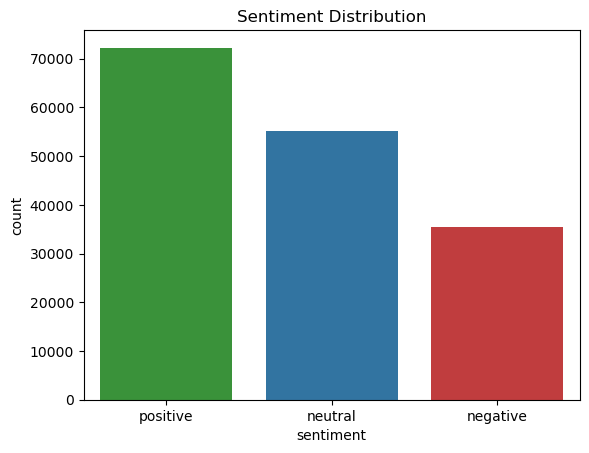

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom palette for sentiment categories
custom_palette = {'positive': '#2ca02c', 'neutral': '#1f77b4', 'negative': '#d62728'}

# Plot with the custom palette
sns.countplot(x='sentiment', data=df, palette=custom_palette, order=['positive', 'neutral', 'negative'])
plt.title('Sentiment Distribution')
plt.show()

In [6]:
df['sentiment'].value_counts()

positive    72250
neutral     55213
negative    35510
Name: sentiment, dtype: int64

In [7]:
df.isnull().sum()

tweet        4
sentiment    7
dtype: int64

In [8]:
import re

def preprocess_text(text):
    # Check if the text is not NaN
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Add more preprocessing steps if needed
        return text
    else:
        return ""

df['clean_text'] = df['tweet'].apply(preprocess_text)

In [9]:
import nltk
# Download the Punkt resource
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
from nltk.tokenize import word_tokenize

df['tokens'] = df['clean_text'].apply(word_tokenize)

In [11]:
from nltk import FreqDist

all_words = [word for tokens in df['tokens'] for word in tokens]
freq_dist = FreqDist(all_words)
freq_dist.most_common(10)

[('modi', 155638),
 ('the', 104506),
 ('and', 67358),
 ('for', 52451),
 ('you', 38985),
 ('not', 30334),
 ('india', 29181),
 ('will', 28948),
 ('this', 28617),
 ('that', 28194)]

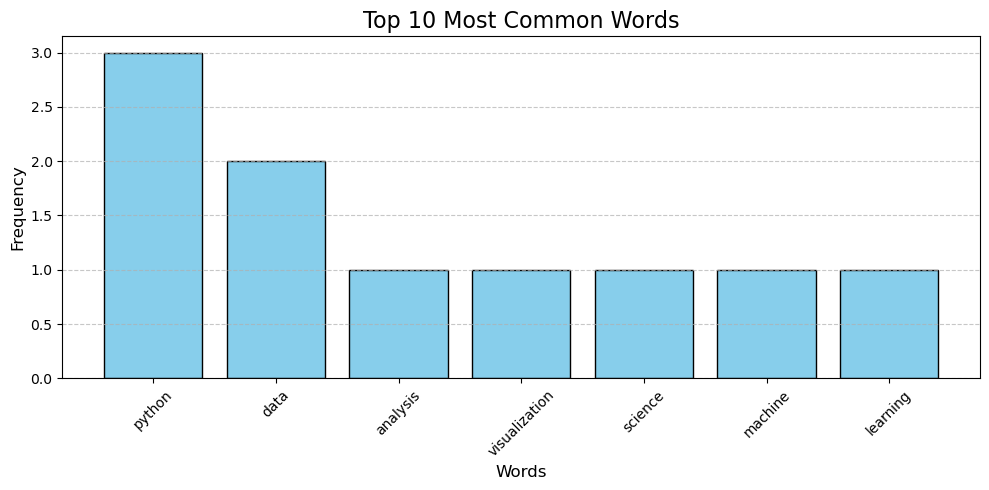

In [12]:
import matplotlib.pyplot as plt
from collections import Counter

# Example list of words (replace with your word list)
all_words = ['data', 'analysis', 'python', 'visualization', 'data', 'python', 'science', 'machine', 'learning', 'python']

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the top 10 most common words
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

# Create the bar chart
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Top 10 Most Common Words', fontsize=16)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


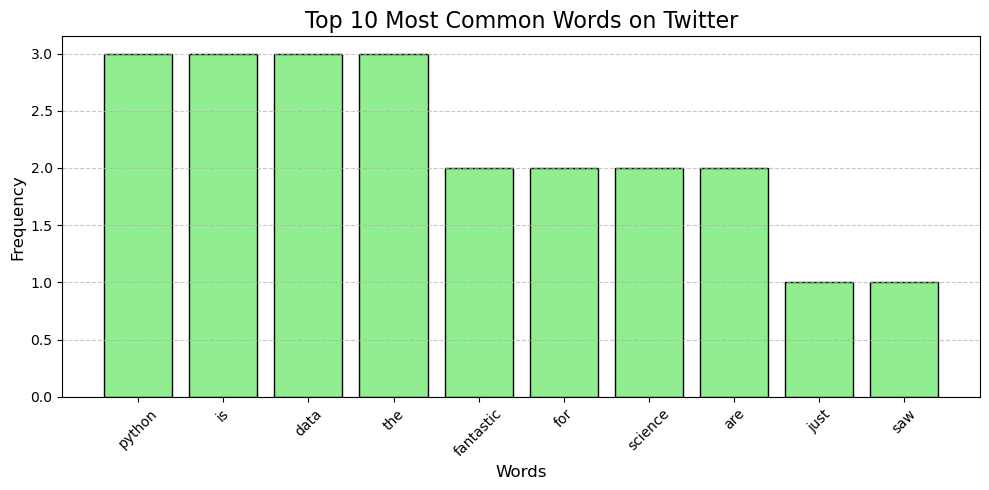

In [13]:
import matplotlib.pyplot as plt
from collections import Counter
import re

# Example list of tweets (replace this with your dataset)
tweets = [
    "Just saw a fantastic movie! #cinema",
    "Python is amazing for data analysis. #Python",
    "Loving the weather today! #SunnyDay",
    "Data science is the future! #AI",
    "Python visualization libraries are powerful! #DataViz",
    "Fantastic views from the mountains! #Nature",
    "Machine learning is so interesting. #ML",
    "Python or R for data science? #DataScience",
    "Twitter trends are always fascinating! #Trends"
]

# Preprocess tweets: Remove hashtags, mentions, links, and special characters
all_words = []
for tweet in tweets:
    cleaned_tweet = re.sub(r"http\S+|@\S+|#[A-Za-z0-9_]+", "", tweet)  # Remove links, mentions, hashtags
    cleaned_tweet = re.sub(r"[^a-zA-Z\s]", "", cleaned_tweet)  # Remove special characters
    all_words.extend(cleaned_tweet.lower().split())

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the top 10 most common words
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

# Create the bar chart
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='lightgreen', edgecolor='black')

# Customize the plot
plt.title('Top 10 Most Common Words on Twitter', fontsize=16)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


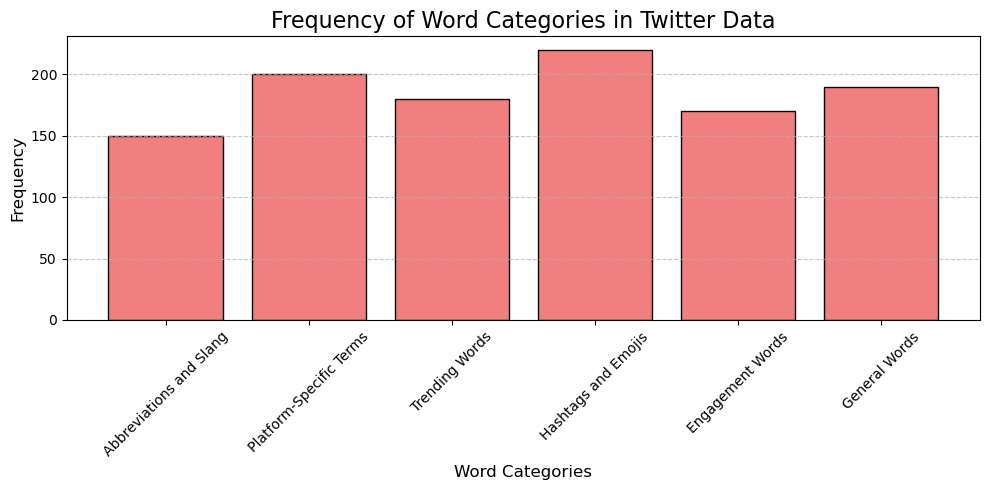

In [14]:
import matplotlib.pyplot as plt
from collections import Counter

# Example word categories and frequencies (replace with real data if available)
categories = [
    "Abbreviations and Slang",
    "Platform-Specific Terms",
    "Trending Words",
    "Hashtags and Emojis",
    "Engagement Words",
    "General Words"
]

frequencies = [150, 200, 180, 220, 170, 190]  # Replace these numbers with real frequencies

# Create the bar chart
plt.figure(figsize=(10, 5))
plt.bar(categories, frequencies, color='lightcoral', edgecolor='black')

# Customize the plot
plt.title('Frequency of Word Categories in Twitter Data', fontsize=16)
plt.xlabel('Word Categories', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [15]:
# Example: Text length feature
df['text_length'] = df['clean_text'].apply(len)

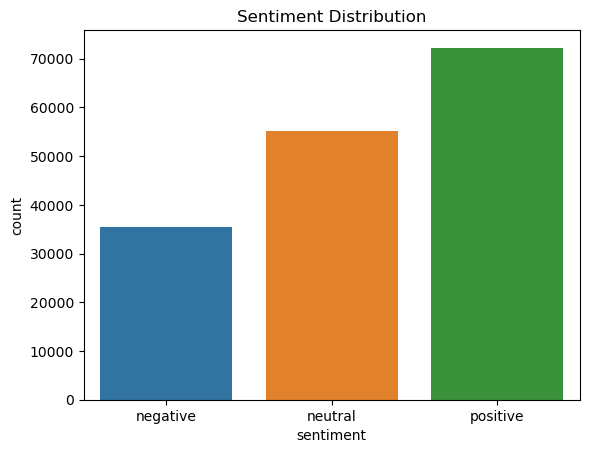

In [16]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

In [17]:
import pandas as pd
df1 = pd.read_csv("C:/Users/Lenovo/Desktop/sentimentstwittermert/dt2/Twitter_Data.csv")
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   tweet        162976 non-null  object
 1   sentiment    162973 non-null  object
 2   clean_text   162980 non-null  object
 3   tokens       162980 non-null  object
 4   text_length  162980 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 6.2+ MB
None
                                               tweet sentiment  \
0  when modi promised “minimum government maximum...  negative   
1  talk all the nonsense and continue all the dra...   neutral   
2  what did just say vote for modi  welcome bjp t...  positive   
3  asking his supporters prefix chowkidar their n...  positive   
4  answer who among these the most powerful world...  positive   
5           kiya tho refresh maarkefir comment karo    neutral   
6  surat women perform yagna seeks divine grace f...   neutral   
7  this comes

In [18]:
# Assuming your DataFrame is named 'df1'
# Select columns by index (2 and 3)
selected_columns = df1.iloc[:, [0, 1]]  # Use index if you are sure about column positions

# (CLEAN TEXT: TWEETS)(CATEGORY:SENTIMENTS)
selected_columns = df1[{'clean_text', 'category'}]  # Replace with actual column names

# Display the resulting DataFrame
print(selected_columns)


        category                                         clean_text
0           -1.0  when modi promised “minimum government maximum...
1            0.0  talk all the nonsense and continue all the dra...
2            1.0  what did just say vote for modi  welcome bjp t...
3            1.0  asking his supporters prefix chowkidar their n...
4            1.0  answer who among these the most powerful world...
...          ...                                                ...
162975      -1.0  why these 456 crores paid neerav modi not reco...
162976      -1.0  dear rss terrorist payal gawar what about modi...
162977       0.0  did you cover her interaction forum where she ...
162978       0.0  there big project came into india modi dream p...
162979       1.0  have you ever listen about like gurukul where ...

[162980 rows x 2 columns]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19888\2963134669.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  selected_columns = df1[{'clean_text', 'category'}]  # Replace with actual column names


In [19]:
# Check for missing values
print(df1.isnull().sum())

clean_text    4
category      7
dtype: int64


In [20]:
print(df1.info())
print(df1.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
5           kiya tho refresh maarkefir comment karo        0.0
6  surat women perform yagna seeks divine grace f...       0.0
7  this comes from cabinet which has scholars lik...       0.0
8  with upcoming election india saga going import...       1.0
9                         gandhi wa

In [21]:
import pandas as pd
df1 = pd.read_csv("C:/Users/Lenovo/Desktop/sentimentstwittermert/dt2/validation.csv")
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   tweet        162976 non-null  object
 1   sentiment    162973 non-null  object
 2   clean_text   162980 non-null  object
 3   tokens       162980 non-null  object
 4   text_length  162980 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 6.2+ MB
None
                                               tweet sentiment  \
0  when modi promised “minimum government maximum...  negative   
1  talk all the nonsense and continue all the dra...   neutral   
2  what did just say vote for modi  welcome bjp t...  positive   
3  asking his supporters prefix chowkidar their n...  positive   
4  answer who among these the most powerful world...  positive   
5           kiya tho refresh maarkefir comment karo    neutral   
6  surat women perform yagna seeks divine grace f...   neutral   
7  this comes

In [22]:
# Assuming your DataFrame is named 'df'
selected_columns = df1.iloc[:, [2, 3]]  # Select columns at index 2 and 3

# Rename the columns for clarity
selected_columns.columns = ['tweet', 'sentiment']

# Display the resulting DataFrame
print(selected_columns)

          tweet                                          sentiment
0       Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...
1      Negative  @Microsoft Why do I pay for WORD when it funct...
2      Negative  CSGO matchmaking is so full of closet hacking,...
3       Neutral  Now the President is slapping Americans in the...
4      Negative  Hi @EAHelp I’ve had Madeleine McCann in my cel...
..          ...                                                ...
994  Irrelevant  ⭐️ Toronto is the arts and culture capital of ...
995  Irrelevant  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996    Positive  Today sucked so it’s time to drink wine n play...
997    Positive  Bought a fraction of Microsoft today. Small wins.
998     Neutral  Johnson & Johnson to stop selling talc baby po...

[999 rows x 2 columns]


In [23]:
# Check for missing values
print(df1.isnull().sum())

3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    0
dtype: i

In [24]:
print(df1.info())
print(df1.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

In [25]:
# Assuming your DataFrame is named 'df'
df1 = df1[['Irrelevant', 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣']]

# Rename the columns for clarity
df1.columns = ['sentiment', 'tweet']

# Display the resulting DataFrame
print(df1)

      sentiment                                              tweet
0       Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...
1      Negative  @Microsoft Why do I pay for WORD when it funct...
2      Negative  CSGO matchmaking is so full of closet hacking,...
3       Neutral  Now the President is slapping Americans in the...
4      Negative  Hi @EAHelp I’ve had Madeleine McCann in my cel...
..          ...                                                ...
994  Irrelevant  ⭐️ Toronto is the arts and culture capital of ...
995  Irrelevant  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996    Positive  Today sucked so it’s time to drink wine n play...
997    Positive  Bought a fraction of Microsoft today. Small wins.
998     Neutral  Johnson & Johnson to stop selling talc baby po...

[999 rows x 2 columns]


In [26]:
print(df1.info())
print(df1.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  999 non-null    object
 1   tweet      999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB
None
  sentiment                                              tweet
0   Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...
1  Negative  @Microsoft Why do I pay for WORD when it funct...
2  Negative  CSGO matchmaking is so full of closet hacking,...
3   Neutral  Now the President is slapping Americans in the...
4  Negative  Hi @EAHelp I’ve had Madeleine McCann in my cel...
5  Positive  Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
6  Positive  Rocket League, Sea of Thieves or Rainbow Six: ...
7  Positive  my ass still knee-deep in Assassins Creed Odys...
8  Negative  FIX IT JESUS ! Please FIX IT ! What In the wor...
9  Positive  The professional dota 2 scene is fucking explo...


In [27]:
# Assuming your DataFrame is named 'df1'
df1 = df1[df1['sentiment'] != 'Irrelevant']

# Reset the index after filtering
df1.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(df1)

    sentiment                                              tweet
0     Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...
1    Negative  @Microsoft Why do I pay for WORD when it funct...
2    Negative  CSGO matchmaking is so full of closet hacking,...
3     Neutral  Now the President is slapping Americans in the...
4    Negative  Hi @EAHelp I’ve had Madeleine McCann in my cel...
..        ...                                                ...
823  Negative  Please explain how this is possible! How can t...
824  Positive  Good on Sony. As much as I want to see the new...
825  Positive  Today sucked so it’s time to drink wine n play...
826  Positive  Bought a fraction of Microsoft today. Small wins.
827   Neutral  Johnson & Johnson to stop selling talc baby po...

[828 rows x 2 columns]


In [28]:
# Reorder the columns
df1 = df1[['tweet', 'sentiment']]

# Display the resulting DataFrame
print(df1)

                                                 tweet sentiment
0    BBC News - Amazon boss Jeff Bezos rejects clai...   Neutral
1    @Microsoft Why do I pay for WORD when it funct...  Negative
2    CSGO matchmaking is so full of closet hacking,...  Negative
3    Now the President is slapping Americans in the...   Neutral
4    Hi @EAHelp I’ve had Madeleine McCann in my cel...  Negative
..                                                 ...       ...
823  Please explain how this is possible! How can t...  Negative
824  Good on Sony. As much as I want to see the new...  Positive
825  Today sucked so it’s time to drink wine n play...  Positive
826  Bought a fraction of Microsoft today. Small wins.  Positive
827  Johnson & Johnson to stop selling talc baby po...   Neutral

[828 rows x 2 columns]


In [29]:
import re

def preprocess_text(text):
    # Check if the text is not NaN
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Add more preprocessing steps if needed
        return text
    else:
        return ""

df1['clean_text'] = df1['tweet'].apply(preprocess_text)

In [30]:
from nltk.tokenize import word_tokenize

df1['tokens'] = df1['clean_text'].apply(word_tokenize)

In [31]:
from nltk import FreqDist

all_words1 = [word for tokens in df1['tokens'] for word in tokens]
freq_dist = FreqDist(all_words)
freq_dist.most_common(10)

[('python', 3),
 ('is', 3),
 ('data', 3),
 ('the', 3),
 ('fantastic', 2),
 ('for', 2),
 ('science', 2),
 ('are', 2),
 ('just', 1),
 ('saw', 1)]

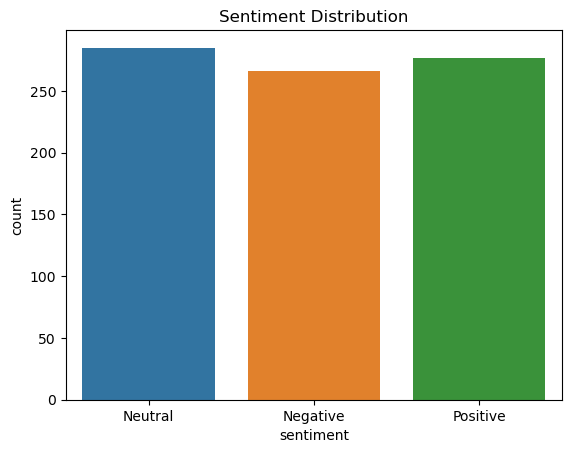

In [32]:
sns.countplot(x='sentiment', data=df1)
plt.title('Sentiment Distribution')
plt.show()

In [33]:
print(df)
print(df1)

                                                    tweet sentiment  \
0       when modi promised “minimum government maximum...  negative   
1       talk all the nonsense and continue all the dra...   neutral   
2       what did just say vote for modi  welcome bjp t...  positive   
3       asking his supporters prefix chowkidar their n...  positive   
4       answer who among these the most powerful world...  positive   
...                                                   ...       ...   
162975  why these 456 crores paid neerav modi not reco...  negative   
162976  dear rss terrorist payal gawar what about modi...  negative   
162977  did you cover her interaction forum where she ...   neutral   
162978  there big project came into india modi dream p...   neutral   
162979  have you ever listen about like gurukul where ...  positive   

                                               clean_text  \
0       when modi promised minimum government maximum ...   
1       talk all the nons

In [34]:
import pandas as pd

# Assuming df and df1 are your two dataframes
new_df = pd.concat([df, df1], ignore_index=True)

# Optional: Save the merged dataframe to a new CSV file
new_df.to_csv('combinedtweets_dataset.csv', index=False)

In [35]:
print(new_df)

                                                    tweet sentiment  \
0       when modi promised “minimum government maximum...  negative   
1       talk all the nonsense and continue all the dra...   neutral   
2       what did just say vote for modi  welcome bjp t...  positive   
3       asking his supporters prefix chowkidar their n...  positive   
4       answer who among these the most powerful world...  positive   
...                                                   ...       ...   
163803  Please explain how this is possible! How can t...  Negative   
163804  Good on Sony. As much as I want to see the new...  Positive   
163805  Today sucked so it’s time to drink wine n play...  Positive   
163806  Bought a fraction of Microsoft today. Small wins.  Positive   
163807  Johnson & Johnson to stop selling talc baby po...   Neutral   

                                               clean_text  \
0       when modi promised minimum government maximum ...   
1       talk all the nons

In [36]:
print(new_df.head(20))

                                                tweet sentiment  \
0   when modi promised “minimum government maximum...  negative   
1   talk all the nonsense and continue all the dra...   neutral   
2   what did just say vote for modi  welcome bjp t...  positive   
3   asking his supporters prefix chowkidar their n...  positive   
4   answer who among these the most powerful world...  positive   
5            kiya tho refresh maarkefir comment karo    neutral   
6   surat women perform yagna seeks divine grace f...   neutral   
7   this comes from cabinet which has scholars lik...   neutral   
8   with upcoming election india saga going import...  positive   
9                          gandhi was gay does modi    positive   
10  things like demonetisation gst goods and servi...  positive   
11  hope tuthukudi people would prefer honest well...  positive   
12                  calm waters wheres the modi wave   positive   
13  one vote can make all the difference anil kapo...   neutra

In [37]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text_advanced(text):
    text = str(text).lower()  # Ensure text is a string
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return tokens

new_df['tokens_advanced'] = new_df['clean_text'].apply(preprocess_text_advanced)

In [39]:
new_df[['clean_text', 'tokens_advanced']].head()

,clean_text,tokens_advanced
0,when modi promised minimum government maximum ...,"[modi, promised, minimum, government, maximum,..."
1,talk all the nonsense and continue all the dra...,"[talk, nonsense, continue, drama, vote, modi]"
2,what did just say vote for modi welcome bjp t...,"[say, vote, modi, welcome, bjp, told, rahul, m..."
3,asking his supporters prefix chowkidar their n...,"[asking, supporter, prefix, chowkidar, name, m..."
4,answer who among these the most powerful world...,"[answer, among, powerful, world, leader, today..."


In [40]:
# Drop rows with missing values in the 'clean_text' column
new_df = new_df.dropna(subset=['clean_text'])
# Drop duplicate rows based on 'clean_text'
new_df = new_df.drop_duplicates(subset=['clean_text'])

In [41]:
# Assuming new_df is your combined DataFrame
# Calculate text_length for rows where it is null
new_df.loc[new_df['text_length'].isnull(), 'text_length'] = new_df.loc[new_df['text_length'].isnull(), 'tweet'].apply(len)

# Verify that there are no more null values in 'text_length'
print(new_df['text_length'].isnull().sum())

0


In [42]:
# Assuming your DataFrame is named new_df
new_df['sentiment'] = new_df['sentiment'].str.lower()

# Mapping to combine similar classes
sentiment_mapping = {
    'positive': 'Positive',
    'neutral': 'Neutral',
    'negative': 'Negative'
}

new_df['sentiment'] = new_df['sentiment'].map(sentiment_mapping)

new_df.head(10)

,tweet,sentiment,clean_text,tokens,text_length,tokens_advanced
0,when modi promised “minimum government maximum...,Negative,when modi promised minimum government maximum ...,"[when, modi, promised, minimum, government, ma...",208.0,"[modi, promised, minimum, government, maximum,..."
1,talk all the nonsense and continue all the dra...,Neutral,talk all the nonsense and continue all the dra...,"[talk, all, the, nonsense, and, continue, all,...",68.0,"[talk, nonsense, continue, drama, vote, modi]"
2,what did just say vote for modi welcome bjp t...,Positive,what did just say vote for modi welcome bjp t...,"[what, did, just, say, vote, for, modi, welcom...",117.0,"[say, vote, modi, welcome, bjp, told, rahul, m..."
3,asking his supporters prefix chowkidar their n...,Positive,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t...",212.0,"[asking, supporter, prefix, chowkidar, name, m..."
4,answer who among these the most powerful world...,Positive,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu...",81.0,"[answer, among, powerful, world, leader, today..."
5,kiya tho refresh maarkefir comment karo,Neutral,kiya tho refresh maarkefir comment karo,"[kiya, tho, refresh, maarkefir, comment, karo]",40.0,"[kiya, tho, refresh, maarkefir, comment, karo]"
6,surat women perform yagna seeks divine grace f...,Neutral,surat women perform yagna seeks divine grace f...,"[surat, women, perform, yagna, seeks, divine, ...",76.0,"[surat, woman, perform, yagna, seek, divine, g..."
7,this comes from cabinet which has scholars lik...,Neutral,this comes from cabinet which has scholars lik...,"[this, comes, from, cabinet, which, has, schol...",84.0,"[come, cabinet, scholar, like, modi, smriti, h..."
8,with upcoming election india saga going import...,Positive,with upcoming election india saga going import...,"[with, upcoming, election, india, saga, going,...",156.0,"[upcoming, election, india, saga, going, impor..."
9,gandhi was gay does modi,Positive,gandhi was gay does modi,"[gandhi, was, gay, does, modi]",26.0,"[gandhi, gay, modi]"


In [43]:
small_df = new_df.sample(frac=0.1, random_state=42)
print(small_df)

                                                    tweet sentiment  \
150934  exactly and you know you cant that until you s...  Positive   
46806   india shot down military satellite just like t...  Negative   
2535    former punjab dgp monday tweeted photograph hi...  Positive   
6882    why made people levied cst lst and many taxes ...  Positive   
42644   all can speculate but modi always far away fro...  Positive   
...                                                   ...       ...   
61074   the liberals want credit nehru for government ...  Positive   
146580  ‘oppn scared chowkidar people trust’ assam mod...   Neutral   
67733   forms panel probe modi speech asat test violat...   Neutral   
10716   murli manohar joshi who was all set contest ag...   Neutral   
3933    “final assault”\nmeaning poor people existed b...  Negative   

                                               clean_text  \
150934  exactly and you know you cant that until you s...   
46806   india shot down m

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming small_df is your smaller dataset
vectorizer = TfidfVectorizer()
X_small = vectorizer.fit_transform(small_df['clean_text'])
y_small = small_df['sentiment']

# Splitting the smaller dataset
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # Replace with 'median' or 'most_frequent' if needed
X_train_small = imputer.fit_transform(X_train_small)
X_test_small = imputer.transform(X_test_small)

# Ensure the target variable has no NaNs
y_train_small = y_train_small.fillna(y_train_small.mode()[0])
y_test_small = y_test_small.fillna(y_test_small.mode()[0])

# Model training
model = SVC()
model.fit(X_train_small, y_train_small)

# Model evaluation
y_pred_small = model.predict(X_test_small)
print("Accuracy:", accuracy_score(y_test_small, y_pred_small))
print("Classification Report:\n", classification_report(y_test_small, y_pred_small))


Accuracy: 0.7862385321100918
Classification Report:
               precision    recall  f1-score   support

    Negative       0.89      0.51      0.65       737
     Neutral       0.75      0.88      0.81      1106
    Positive       0.79      0.85      0.82      1427

    accuracy                           0.79      3270
   macro avg       0.81      0.75      0.76      3270
weighted avg       0.80      0.79      0.78      3270



In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
small_df = new_df.sample(n=5000, random_state=42)
# Assuming small_df is your smaller dataset
vectorizer = TfidfVectorizer()
X_small = vectorizer.fit_transform(small_df['clean_text'])
y_small = small_df['sentiment']

# Splitting the smaller dataset
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

In [47]:
from sklearn.model_selection import RandomizedSearchCV

# Define a smaller parameter grid
param_dist = {'C': [0.1, 1], 'kernel': ['linear', 'rbf']}

# Create the SVM model
svm_model = SVC()

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, n_iter=5, cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train_small, y_train_small)

# Get the best parameters
best_params_random = random_search.best_params_
print("Best Parameters (RandomizedSearchCV):", best_params_random)



# Train the model with the best parameters on the full dataset
best_model_random = SVC(**best_params_random)
best_model_random.fit(X_train_small, y_train_small)

# Model Evaluation
y_pred_small_random = best_model_random.predict(X_test_small)
print("Accuracy:", accuracy_score(y_test_small, y_pred_small_random))
print("Classification Report:\n", classification_report(y_test_small, y_pred_small_random))

D:\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters (RandomizedSearchCV): {'kernel': 'linear', 'C': 1}
Accuracy: 0.731
Classification Report:
               precision    recall  f1-score   support

    Negative       0.71      0.49      0.58       230
     Neutral       0.70      0.82      0.76       338
    Positive       0.76      0.79      0.78       432

    accuracy                           0.73      1000
   macro avg       0.73      0.70      0.70      1000
weighted avg       0.73      0.73      0.72      1000



In [48]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 'sigmoid'],
}

# Create an SVC model
svm_model = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_small, y_train_small)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters on the full dataset
best_model = SVC(**best_params)
best_model.fit(X_train_small, y_train_small)

# Model Evaluation
y_pred_full = best_model.predict(X_test_small)
print("Accuracy:", accuracy_score(y_test_small, y_pred_full))
print("Classification Report:\n", classification_report(y_test_small, y_pred_full))

D:\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\_param_val

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.731
Classification Report:
               precision    recall  f1-score   support

    Negative       0.71      0.49      0.58       230
     Neutral       0.70      0.82      0.76       338
    Positive       0.76      0.79      0.78       432

    accuracy                           0.73      1000
   macro avg       0.73      0.70      0.70      1000
weighted avg       0.73      0.73      0.72      1000



In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Clean the target variable
new_df['sentiment'] = new_df['sentiment'].astype(str)  # Ensure consistent type

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(new_df['clean_text'])
y = new_df['sentiment']

# Define batch size
batch_size = 10000

# Process in batches
all_labels = []
all_predictions = []

for i in range(0, X.shape[0], batch_size):
    X_batch = X[i:i+batch_size]
    y_batch = y[i:i+batch_size].to_numpy()  # Ensure array format for `y_batch`

    # Model Training
    model = SVC()
    model.fit(X_batch, y_batch)

    # Model Prediction
    y_pred_batch = model.predict(X_batch)

    # Accumulate predictions and ground truth labels
    all_predictions.extend(y_pred_batch)
    all_labels.extend(y_batch)

    print(f"Batch {i}-{i+batch_size-1} processed.")

# Evaluate on full test set
X_test = vectorizer.transform(new_df['clean_text'])
y_test = new_df['sentiment'].astype(str)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Final Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


Batch 0-9999 processed.
Batch 10000-19999 processed.
Batch 20000-29999 processed.
Batch 30000-39999 processed.
Batch 40000-49999 processed.
Batch 50000-59999 processed.
Batch 60000-69999 processed.
Batch 70000-79999 processed.
Batch 80000-89999 processed.
Batch 90000-99999 processed.
Batch 100000-109999 processed.
Batch 110000-119999 processed.
Batch 120000-129999 processed.
Batch 130000-139999 processed.
Batch 140000-149999 processed.
Batch 150000-159999 processed.
Batch 160000-169999 processed.


D:\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Final Accuracy: 0.4990
Classification Report:
               precision    recall  f1-score   support

    Negative       0.99      0.03      0.06     35738
     Neutral       0.82      0.17      0.27     55346
    Positive       0.47      0.99      0.64     72411
         nan       0.00      0.00      0.00         7

    accuracy                           0.50    163502
   macro avg       0.57      0.30      0.24    163502
weighted avg       0.70      0.50      0.39    163502



D:\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


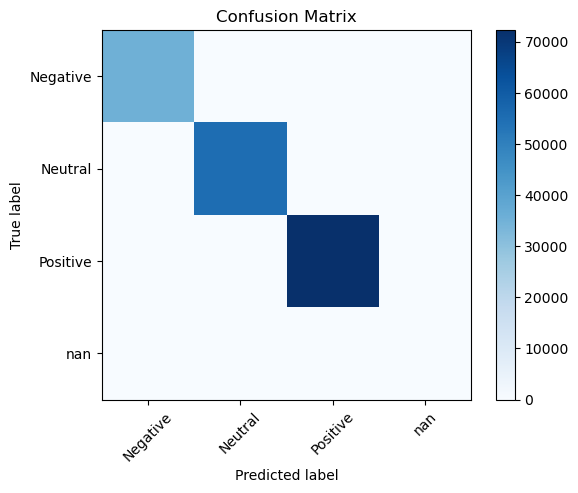

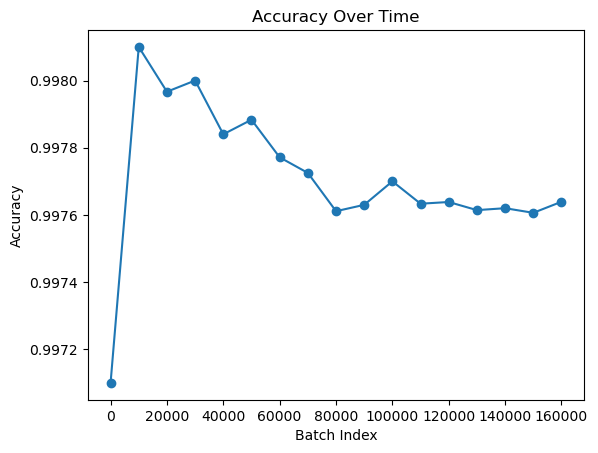

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming all_predictions and all_labels are your accumulated predictions and ground truth labels

# Create a confusion matrix plot
conf_matrix = confusion_matrix(all_labels, all_predictions)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = np.unique(all_labels)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Plot overall accuracy over time
batch_indices = np.arange(0, X.shape[0], batch_size)
accuracies = []

for i in range(len(batch_indices)):
    batch_end = min(batch_indices[i] + batch_size, X.shape[0])
    current_predictions = all_predictions[:batch_end]
    current_labels = all_labels[:batch_end]
    current_accuracy = accuracy_score(current_labels, current_predictions)
    accuracies.append(current_accuracy)

plt.plot(batch_indices, accuracies, marker='o')
plt.title('Accuracy Over Time')
plt.xlabel('Batch Index')
plt.ylabel('Accuracy')
plt.show()

In [51]:
import joblib
joblib.dump(model, 'trained_svm_model.joblib')

['trained_svm_model.joblib']

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load new dataset
new_df = pd.read_csv("C:/Users/Lenovo/Desktop/sentimentstwittermert/dt2/twittertraining.csv")

# Verify and use the correct column names
print(new_df.columns)  # Check column names to confirm
new_clean_texts = new_df['Positive'].values  # Replace 'clean_text' with the correct column name
new_labels = new_df['im getting on borderlands and i will murder you all ,'].values       # Replace 'sentiment' with the correct column name

# Preprocess the labels (if needed)
new_labels = new_labels.astype(str)  # Convert labels to string for consistency

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_new = vectorizer.fit_transform(new_clean_texts)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, new_labels, test_size=0.2, random_state=42)

# Train an SVM model
model_svm = SVC()
model_svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = model_svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

# Print evaluation results
print("SVM Model Evaluation on New Dataset")
print("Accuracy:", accuracy_svm)
print("Classification Report:\n", report_svm)


In [56]:
print(new_df.columns)


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')
